## Backpropagation

### Part I. Classic

Do a forward pass (calculate green values), and a backward pass (calculate gradients, red
values).

![title](HA4_backprop.png)

# Forward and Backward Pass Solution

## Given:
- **Inputs:** $X_0 = -2.00$, $X_1 = 4.00$
- **Weights:** $W_0 = 3.00$, $W_1 = -1.00$
- **Activation:** $\text{ReLU}(x) = \max(0, x)$
- **Initial gradient:** $\frac{\partial L}{\partial L} = 1.0$

---

## Forward Pass

### Step 1: Multiply inputs by weights

$$s_0 = W_0 \times X_0 = 3.00 \times (-2.00) = -6.00$$

$$s_1 = W_1 \times X_1 = (-1.00) \times 4.00 = -4.00$$

### Step 2: Addition

$$s_2 = s_0 + s_1 = (-6.00) + (-4.00) = -10.00$$

### Step 3: ReLU activation

$$L = \text{ReLU}(s_2) = \max(0, -10.00) = 0.00$$

---

## Backward Pass

### Step 1: Initial gradient

$$\frac{\partial L}{\partial L} = 1.0$$

### Step 2: Gradient through ReLU

$$\frac{\partial L}{\partial s_2} = \frac{\partial L}{\partial L} \times \text{ReLU}'(s_2)$$

Since $s_2 = -10.00 < 0$, we have $\text{ReLU}'(s_2) = 0$:

$$\frac{\partial L}{\partial s_2} = 1.0 \times 0 = 0.0$$

### Step 3: Gradient through addition

$$\frac{\partial L}{\partial s_0} = \frac{\partial L}{\partial s_2} = 0.0$$

$$\frac{\partial L}{\partial s_1} = \frac{\partial L}{\partial s_2} = 0.0$$

### Step 4: Gradient through multiplication (multiply gate)

**Upper branch:**

$$\frac{\partial L}{\partial W_0} = \frac{\partial L}{\partial s_0} \times X_0 = 0.0 \times (-2.00) = 0.00$$

$$\frac{\partial L}{\partial X_0} = \frac{\partial L}{\partial s_0} \times W_0 = 0.0 \times 3.00 = 0.00$$

**Lower branch:**

$$\frac{\partial L}{\partial W_1} = \frac{\partial L}{\partial s_1} \times X_1 = 0.0 \times 4.00 = 0.00$$

$$\frac{\partial L}{\partial X_1} = \frac{\partial L}{\partial s_1} \times W_1 = 0.0 \times (-1.00) = 0.00$$


All gradients are zero because ReLU "killed" the gradient when $s_2 < 0$.


### Part II. Some coding bits

In [1]:
import numpy as np


In [2]:
def affine(x, w, b):
    return w * x + b
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
def gaussian(x):
    return np.exp(-x*x)
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))
def mse(y,yout):
    return np.mean((y-yout)*(y-yout))

In [8]:
x = 1.
actual = gaussian(x) # target value

##### initialization

w_1 = np.array([1., -1.])
b_1 = np.array([1., 1.])

w_2 = np.array([1., -1.])
b_2 = np.array([1.])

In [9]:
### do the forward pass of the network
z_2, z_3 = 0, 0
def forward():
    global z_2, z_3
    z_2 = affine(x, w_1, b_1)
    h_1_2 = sigmoid(z_2)

    z_3 =  np.sum(w_2 * h_1_2) + b_2[0]
    out = z_3
    return out, h_1_2

In [21]:
out, h_1_2 = forward()

In [11]:
z_3

np.float64(1.3807970779778822)

In [12]:
actual

np.float64(0.36787944117144233)

Is the output of the network close to the actual value?

output is not close to the actual value of the function.

In [15]:
#### DERIVATIVES CALCULATION
### enter your code here
dL_dout = 2 * (out - actual)  # derivative of MSE loss

dw_2 = dL_dout * h_1_2
db_2 = dL_dout

dL_dh = dL_dout * w_2
dL_dz2 = dL_dh * sigmoid_derivative(z_2)

dw_1 = dL_dz2 * x
db_1 = dL_dz2


##### WEIGHTS UPDATE
### enter your code here
lr = 0.01  # learning rate
w_1 = w_1 - lr * dw_1
w_2 = w_2 - lr * dw_2

b_1 = b_1 - lr * db_1
b_2 = b_2 - lr * db_2

In [22]:
out, h_1_2 = forward()
print(f"New output: {out}, Actual: {actual}")

New output: 1.3367603304339668, Actual: 0.36787944117144233


Did output become closer to the actual value of the function?

the output is now closer to the actual value of the function after one update so we need wrap it on loop  to see better results

### wrap things in to a loop

In [54]:
N = 50000
lr = 0.01

In [49]:
X = np.linspace(-5.0, 5.0, 500)

##### initialization

w_1 = np.array([1., -1.])
b_1 = np.array([1., 1.])

w_2 = np.array([1., -1.])
b_2 = np.array([1.])


for i in range(N):
    x = np.random.choice(X)
    actual = gaussian(x)

    #### FORWARD PASS
    out, h_1_2 = forward()

    #### DERIVATIVES CALCULATION
    dL_dout = 2 * (out - actual)

    dw_2 = dL_dout * h_1_2
    db_2 = dL_dout

    dL_dh = dL_dout * w_2
    dL_dz2 = dL_dh * sigmoid_derivative(z_2)

    dw_1 = dL_dz2 * x
    db_1 = dL_dz2

    ##### WEIGHTS UPDATE
    w_1 = w_1 - lr * dw_1
    w_2 = w_2 - lr * dw_2

    b_1 = b_1 - lr * db_1
    b_2 = b_2 - lr * db_2

Now let's plot things and see what they look like.

In [25]:
z1 = affine(X, w_1[0], b_1[0])
z2 = affine(X, w_1[1], b_1[1])

# Node outputs
h1 = sigmoid(z1)
h2 = sigmoid(z2)

z3 = affine(h1, w_2[0], 0) + affine(h2, w_2[1], b_2[0])
out = z3

so i defined all z's and h's for plotting like in the begining

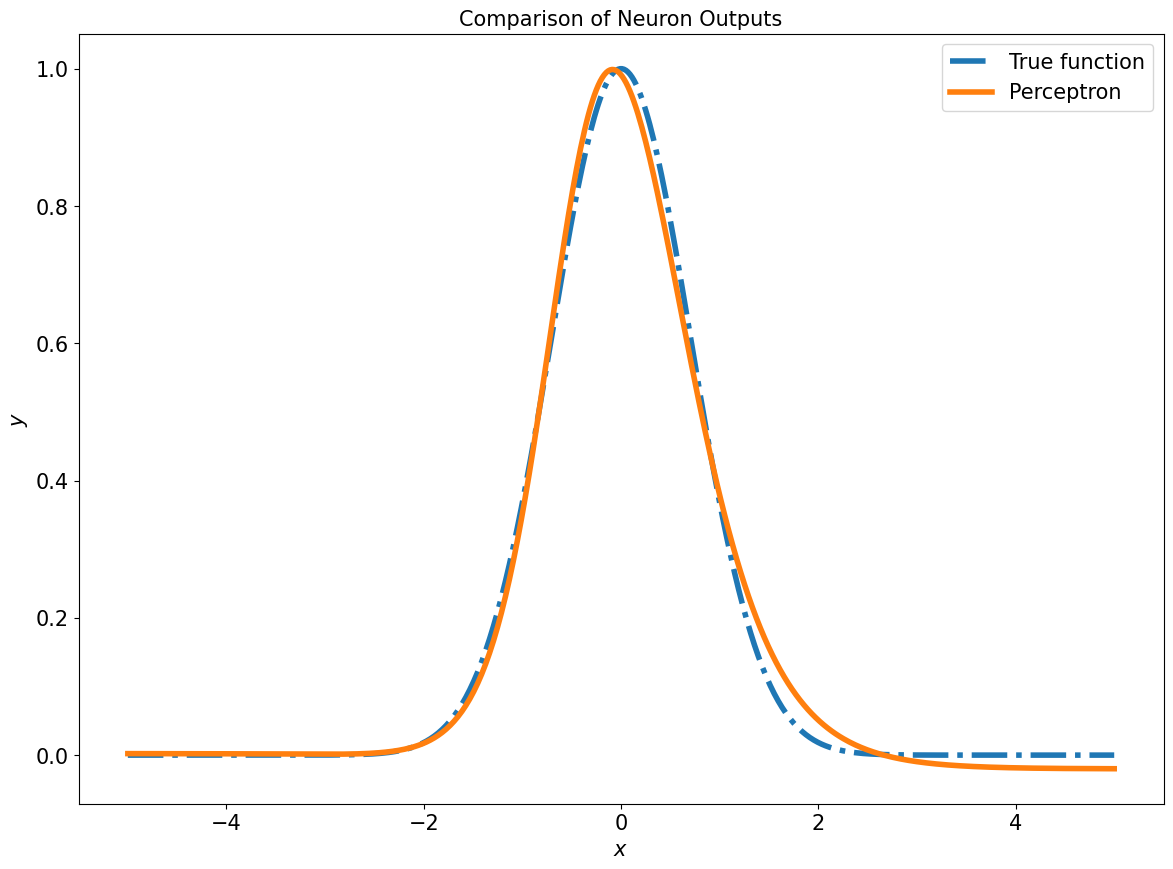

In [26]:
from matplotlib import pyplot as plt

### Uncomment and run when z's and h's computed

SIZE = 15

fig, ax = plt.subplots(1,1, figsize=(14,10))

ax.plot(X, gaussian(X), lw=4, ls = '-.', label='True function')
ax.plot(X, out, lw=4, label='Perceptron')
# ax.plot(x, h2, lw=4, label='Second neuron')

# Set title
ax.set_title('Comparison of Neuron Outputs', fontsize=SIZE)

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

ax.legend(fontsize=SIZE, loc='best') # Create a legend and make it big enough to read

we can see that after training the perceptron approximates the Gaussian function quite well.

### Classification problem

Fill out the code for the following classification problem. Implement:
- foward pass
- backward pass
- weight updates

In [27]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

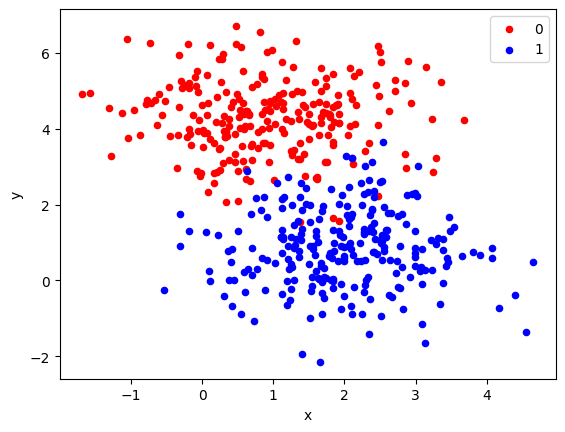

In [28]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=0)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [32]:
x = X_test

In [33]:
##### initialization ('ones')
w_1 = np.array([1, 1])
b_1 = np.array([1])

In [39]:
z1 = x @ w_1 + b_1

# Node outputs
h1 = sigmoid(z1)

### Check the accuracy

In [42]:
pred = [int(score > 0.5) for score in h1]
sum(pred == y_test) / len(y_test)

np.float64(0.45)

so the initial accuracy is not random which is default for binary classification

### generalization ==> wrap into a proper loop

In [310]:
### Loop

In [51]:
N = 10000 # epochs

In [52]:
batch_size = 10 # 2, 4, 8, 16, 32, ... 10 is also an example

##### initialization

w_1 = np.array([1.,1.])
b_1 = np.array([1.])


for i in range(N):
    perm = np.random.permutation(len(X_train))
    X_train = X_train[perm]
    y_train = y_train[perm]

    for batch_id in range(int(len(X_train)/batch_size)):
        x = X_train[batch_id*batch_size:(batch_id+1)*batch_size]
        y = y_train[batch_id*batch_size:(batch_id+1)*batch_size]

        m = x.shape[0]
        #### FORWARD PASS
        z_1 = x @ w_1 + b_1 # linear step
        h_1 = sigmoid(z_1) # activation step


        #### DERIVATIVES CALCULATION
        error = h_1 - y # shape (batch_size, )
        dw1 = (x.T @ error) / m  # shape (n_features, )
        db1 = np.sum(error) / m  # shape (1, )


        ##### WEIGHTS UPDATE
        w_1 = w_1 - lr * dw1
        b_1 = b_1 - lr * db1

In [53]:
from sklearn.metrics import accuracy_score

In [55]:
### check the accuracy on the test set
y_pred = sigmoid(X_test @ w_1 + b_1)
accuracy_score(y_test, y_pred > 0.5)

0.95

the accuracy improved after training the perceptron on the training set and now it is significantly higher than random guessing. I think with more epochs and better hyperparameters it can be improved even further, but for the sake of this assignment I will stop here